## Lab 4

ER190 | Fall 2018

Duncan Callaway
<br>GSI: Seigi Karasaki

Your name:
<br>Collaborators:

<b>Warm-up:</b> Let's take a look at some <a href="https://www.anychart.com/blog/2017/09/22/data-visualization-best-practices-dataviz-weekly/">example figures</a>. Your table will be assigned to focus on one of the four (we'll count off in lab). <br><br>What do you like about this figure, in particular? What can be improved?

In [ ]:
# your answer here
# you're encouraged to include notes from other tables

Note: in class, we mentioned the importance of considering color-blindedness in choosing your color palettes. There are a lot of resources about this online. Seaborn, a data visualization library we'll be using, has a number of [useful pre-set options](https://seaborn.pydata.org/tutorial/color_palettes.html). 

In [131]:
import pandas as pd
import numpy as np
import os

Let's take a look at the files in our data folder.

In [132]:
os.listdir('data')

['CCEEB Oakland MacArthur B (37.8013754 -122.2189913) Primary 08_05_2018 09_04_2018.csv',
 'Ecole Bilingue de Berkeley (37.854830799999995 -122.28937169999999) Primary 08_05_2018 09_04_2018.csv',
 'HDI_use_electrified.csv',
 'North Berkeley (37.8751646 -122.27071009999999) Primary 08_05_2018 09_04_2018.csv',
 'West Oakland, Oakland, CA (37.809883299999996 -122.29767190000001) Primary 08_05_2018 09_04_2018.csv']

Create a dataframe called EcoleBiling, using the 'Ecole Bilingue de Berkeley ...' csv file.

In [ ]:
EcoleBiling = pd.read_csv(...)

Let's use `.describe()` to take a look at the data.

Notice how, if we just rely on describe() to look for columns, we would miss the created_at datetime column. It's omitted because isn't a numeric type. 

If you want describe() to return all columns, try: DataFrame.describe(include = 'all').

In [5]:
# check for a list of the columns - note 'created_at' at index 0.
EcoleBiling.columns

Index(['created_at', 'entry_id', 'PM1.0_CF_ATM_ug/m3', 'PM2.5_CF_ATM_ug/m3',
       'PM10.0_CF_ATM_ug/m3', 'UptimeMinutes', 'RSSI_dbm', 'Temperature_F',
       'Humidity_%', 'PM2.5_CF_1_ug/m3', 'Unnamed: 10'],
      dtype='object')

# Plotting distributions

To keep things simple, we'll focus on just the PM2.5 data. If you look closely, you'll see that there are two columns that are related to PM2.5. We'll be using the one adjusted for atmospheric pressure.

In [136]:
# Extract two columns: the time/date of measurement, and the information on PM2.5
EcoleBiling = EcoleBiling.loc[:,['created_at','PM2.5_CF_ATM_ug/m3']]
EcoleBiling.columns = ['time', 'PM2.5']
# Remember - checking the time zone is always really important, especially if you're looking across regions!
EcoleBiling['time'] = pd.to_datetime(EcoleBiling['time'], utc = True)
EcoleBiling.head()

,time,PM2.5
0,2018-08-05 00:00:31+00:00,4.34
1,2018-08-05 00:01:51+00:00,3.89
2,2018-08-05 00:03:11+00:00,4.93
3,2018-08-05 00:04:31+00:00,4.26
4,2018-08-05 00:05:51+00:00,4.06


## Histograms
Exercise 1: plot a histogram of PM2.5 concentrations at Ecole Bilingue.

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns # seaborn is a data visualization library

First, try calling a histogram without changing any parameters.

Note: Semi-colons *usually* don't mean anything in Python. Here, it's suppressing fig's repr call, which isn't necessary/very meaningful to us. Try running this cell without the semi-colon.

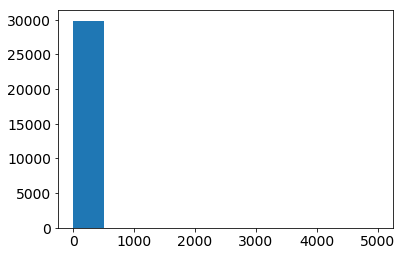

In [152]:
plt.hist(EcoleBiling['PM2.5']);

This.. is not very useful.

<b>Q1) What is the primary cause of our problem? How can we solve it?</b>

In [9]:
# your answer here

For the purposes of this exercise, we'll choose an arbitrary threshold for our exclusion criteria (e.g., PM2.5 > 150).

In [10]:
# create a copy of the original before we start manipulating... just in case
EcoleBiling_orig = EcoleBiling

# filter EcoleBiling by our PM2.5 value threshold (150)
# option 1: select all PM2.5 measurements <=150
# option 2: set all PM2.5 measurements >150 = NaN, then drop NaN values when graphing
EcoleBiling.loc[EcoleBiling['PM2.5'] > 150,'PM2.5'] = np.nan

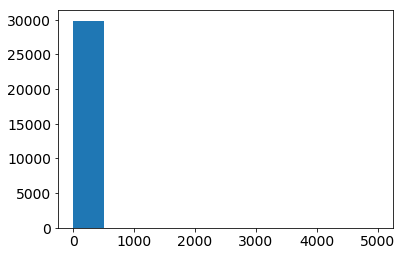

In [143]:
plt.hist(EcoleBiling['PM2.5'].dropna());

This looks much better!

In this histogram, we can see some really high concentration days around 100 $\mu g/m^3$.

Let's label the axes:

In [ ]:
plt.hist(...)
plt.xlabel(...)
plt.ylabel(...)
plt.title(...)

<b>Q2) Take a moment to play around with the bin size. Print your favorite below.</b>

In [ ]:
# your code here - include graph of favorite histogram


## Kernel density estimates (KDE)

<img src = "images/kde_1.png" style = "float:left;width:330px">
<img src = "images/kde_2.png" style = "float:left;width:330px">
<img src = "images/kde_3.png" style = "float:left;width:330px">

Exercise 2: use `seaborn` to create KDE plots. Before we begin, use `shift+tab` and check out the documentation.

In [14]:
sns.kdeplot()

TypeError: kdeplot() missing 1 required positional argument: 'data'

<b>Q3) From what you can tell, which parameter(s) might be key to adjust the way in which the data is represented?</b>

In [15]:
# your answer here

Let's draw a KDE plot using seaborn.

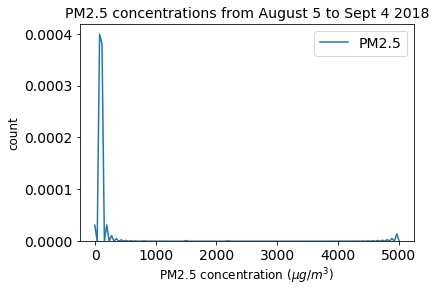

In [150]:
sns.kdeplot(EcoleBiling['PM2.5'].dropna())

# add labels
plt.xlabel('PM2.5 concentration ($\mu g/m^3$)', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('PM2.5 concentrations from August 5 to Sept 4 2018', fontsize = 14);

<b>Q4) Adjust the bandwidth parameter to see its effect on the smoothness of the plot.  What does it do? Plot an example.

In [17]:
# your answer here

In [18]:
# your plot(s) here with your chosen bandwidth value

Now let's include another location:

In [19]:
WestOak = pd.read_csv('data/West Oakland, Oakland, CA (37.809883299999996 -122.29767190000001) Primary 08_05_2018 09_04_2018.csv')
WestOak.describe()

,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_CF_1_ug/m3,Unnamed: 10
count,32048.00000,32048.000000,32048.000000,32048.000000,32048.000000,32048.000000,32048.000000,32048.000000,32048.000000,0.0
mean,281849.50000,14.155366,20.366601,21.720361,1092.437313,-41.920401,71.367730,51.802421,18.744397,NaN
std,9251.60505,11.878241,17.711724,19.098913,1110.726065,14.788609,5.123712,7.966583,13.570458,NaN
min,265826.00000,0.480000,0.760000,0.760000,0.000000,-82.000000,63.000000,27.000000,0.760000,NaN
25%,273837.75000,5.180000,7.390000,7.897500,316.000000,-45.000000,67.000000,46.000000,7.390000,NaN
50%,281849.50000,10.610000,14.980000,15.880000,750.000000,-44.000000,70.000000,54.000000,14.980000,NaN
75%,289861.25000,19.380000,27.560000,29.220000,1436.000000,-42.000000,75.000000,58.000000,27.540000,NaN
max,297873.00000,105.620000,141.300000,146.840000,5662.000000,31.000000,89.000000,65.000000,93.220000,NaN


In [20]:
WestOak = WestOak.loc[:,['created_at','PM2.5_CF_ATM_ug/m3']]
WestOak.columns = ['time', 'West Oakland PM2.5']
WestOak['time'] = pd.to_datetime(WestOak['time'], utc = True)
WestOak.head()

,time,West Oakland PM2.5
0,2018-08-05 00:00:47+00:00,6.24
1,2018-08-05 00:02:07+00:00,6.36
2,2018-08-05 00:03:27+00:00,5.20
3,2018-08-05 00:04:47+00:00,6.50
4,2018-08-05 00:06:07+00:00,4.56


Now try plotting the PM2.5 values for both EcoleBiling and WestOak in one plot.

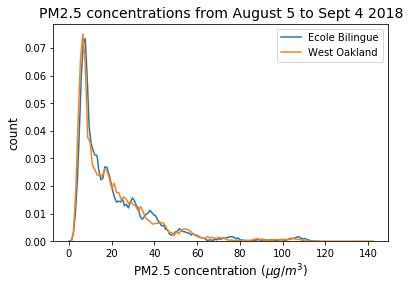

In [21]:
# your answer here

## Box and whisker plots

<img src = "images/bp_1.png" style = "float:left;width:500px">
<img src = "images/bp_2.png" style = "float:left;width:500px">

From the <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">seaborn documention</a>:

> A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In order to plot box and whisker plots with more than one category of data, we need each category to have the same length.

We could do a `merge` on the time column, but all the time measurements are different (i.e., not all measurements are taken at the exact same second/moment in time). The 'inner join' merge omits all data without matching keys.

Remember what the different types of merges do (<a href="http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/">img source</a>; <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html">pandas doc</a>):<br><br>

<img src = "http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png" style = "width:500px">

<br>For our purposes here, we should use 'outer join' to preserve all the data. 'Outer join' returns NaN for all cells without matching keys. Think: what would happen if we used right, inner, or left, here?

In [92]:
pm_merged = pd.merge(WestOak, EcoleBiling, how='outer')

pm_merged.rename(columns = {'PM2.5':'EcoleBiling PM2.5'}, inplace = True)

In [94]:
pm_merged.head()

,time,West Oakland PM2.5,EcoleBiling PM2.5
0,2018-08-05 00:00:47+00:00,6.24,NaN
1,2018-08-05 00:02:07+00:00,6.36,NaN
2,2018-08-05 00:03:27+00:00,5.20,NaN
3,2018-08-05 00:04:47+00:00,6.50,NaN
4,2018-08-05 00:06:07+00:00,4.56,NaN


Let's plot a boxplot using seaborn without changing any parameters.

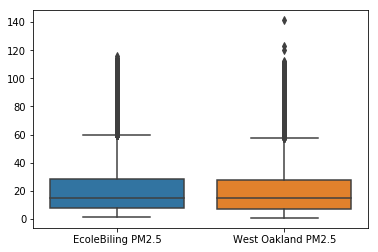

In [95]:
sns.boxplot(data = pm_merged[['EcoleBiling PM2.5','West Oakland PM2.5']])

Next, let's add x and y labels. Notice that the seaborn syntax is a little different from standard matplotlib.

<a href="https://seaborn.pydata.org/generated/seaborn.set.html">seaborn.set</a> is used for customizing seaborn plot aesthetics.

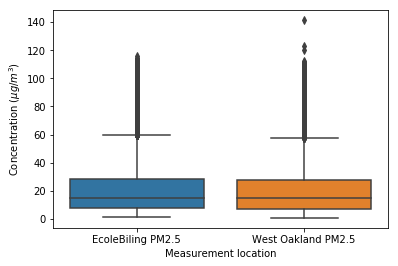

In [96]:
# use .set to customize the axis labels

Great! Now change the orientation of our box and whiskers plot, from vertical to horizontal.

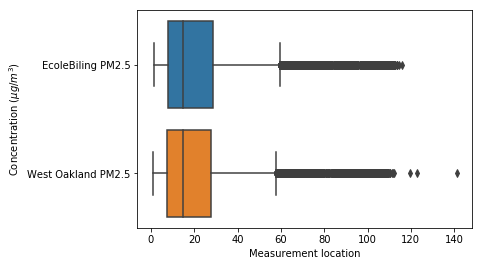

In [98]:
# your answer here

<b>Q5)</b> Take a few minutes to play with some of sns.boxplot's parameters. At a minimum, try changing your plot's whiskers. Print out (one of) your favorite graph(s) below, and explain what it might do to the viewer's interpretation of the data. 

In [ ]:
# your answer here

<b>Violin plots</b> are a very cool hybrid of box plots and density plots! We won't go into them in this lab, but I encourage you to try playing around with them. Below is how our box plots above would look like, in violin-plot format.

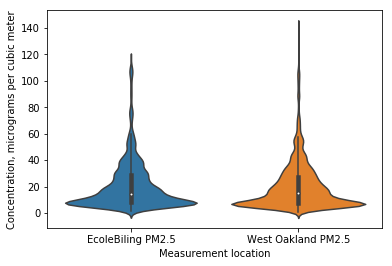

In [99]:
viol_ex = sns.violinplot(
    data = pm_merged[['EcoleBiling PM2.5', 'West Oakland PM2.5']]
)

viol_ex.set(
    xlabel = 'Measurement location', 
    ylabel = 'Concentration, micrograms per cubic meter',
);

## Scatter plots


Let's load a data set that contains HDI, electricity use per capita and electrification rates for most countries in the world.  

Note -- this is a data set that Duncan adapted from Alstone, Gershensen and Kammen (2015).  We'll read this paper next week.

In [100]:
df_HDIUseElec = pd.read_csv('data/HDI_use_electrified.csv', index_col=0)
df_HDIUseElec.head()

,country,year,elec,hdi,region,use
0,Albania,1990,61.023079,0.656,Europe & Central Asia,552.252185
1,Albania,2000,65.858791,0.691,Europe & Central Asia,1449.647413
2,Albania,2002,66.781611,0.703,Europe & Central Asia,1578.165919
3,Albania,2004,NaN,0.715,Europe & Central Asia,1797.525487
4,Albania,2005,NaN,0.721,Europe & Central Asia,1722.072850


In this dataset, 'elec' is the percentage of population with electricity access, and 'use' is per-capita electricity consumption per year (in kWh). 

`plt.scatter` is a useful function for plotting scatter plots (there are others in Seaborn).

Plot a basic scatterplot using matplotlib, without changing any parameters.

Reminder: you can call dataframe columns directly as an attribute (<a href="https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access">see here for documentation</a>), using the syntax df.nameofcolumn.

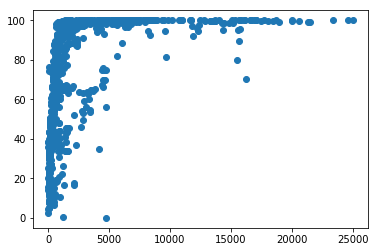

In [103]:
plt.scatter(df_HDIUseElec.use, df_HDIUseElec.elec);

Now let's talk about all the cool ways to customize this plot.  

First, let's deal with the obvious -- we need labels.

### Customizing <a href ="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.rc.html">rc parameters</a>

In the case we are planning to plot multiple graphs, but want to customize font sizes/etc. across all of them, it would be convenient if we could change the underlying defaults. We can do this by modifying the rc settings within matplotlib. Note that sometimes we need to run the cell twice to get the changes in font size to register. 

Where does 'rc' come from? According to Daerdemandt, on <a href="https://stackoverflow.com/questions/37728087/rc-params-in-matplotlib-what-does-rc-stand-for">stackoverflow</a>:
> It stems from practice of having your configs executable - they are automatically run and startup and they configure your stuff.

Let's take a look at the code below. How does it differ from earlier plots in terms of readability and flexibility?

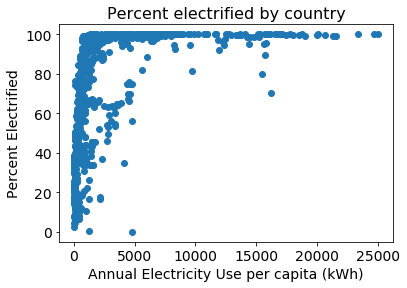

In [113]:
plt.scatter(df_HDIUseElec.use, df_HDIUseElec.elec)
plt.xlabel('Annual Electricity Use per capita (kWh)')
plt.ylabel('Percent Electrified');
plt.title('Percent electrified by country');

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the x-label ticks
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the y-label ticks
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of figure

## Adding color to describe a third variable

Next cool thing -- we can change the color of the dot according to another field of the data set.  

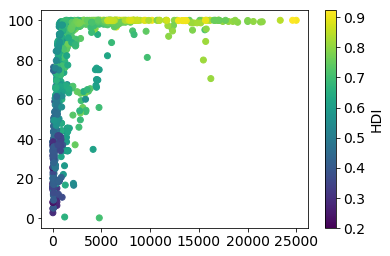

In [123]:
colors = df_HDIUseElec.hdi
plt.scatter(df_HDIUseElec.use, df_HDIUseElec.elec, c=colors)

# The following adds a legend according to the chart coloring.
cbar = plt.colorbar()  # show color scale
cbar.set_label('HDI')

Specifying the 'c' parameter allows us to do this! 

The default is viridis, but matplotlib has many more pre-set color maps (image source: <a href ="https://matplotlib.org/users/colormaps.html">matplotlib</a>).

<img src = "https://matplotlib.org/users/plotting/colormaps/lightness_00.png" style = "width:350px">

In order to change the colormap of a graph, we need to import cm from matplotlib before changing the cmap parameter.

In [125]:
from matplotlib import cm

<b>Q7)</b> Spend a few minutes looking over different <a href="https://matplotlib.org/users/colormaps.html">colormaps</a>. Try some out for this example! Show your favorite one below.

In [ ]:
# your code here

As you might have noticed already, it's really easy to get carried away by pretty and flashy color schemes. Resist this temptation! Remember, in the end, the interpretability of your graph is paramount. Ask yourselves: what exactly am I trying to achieve by choosing this color scheme? Am I achieving it?

---

Now let's adjust the *size* of the dots.

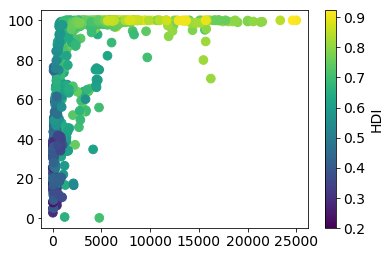

In [37]:
colors = df_HDIUseElec.hdi
plt.scatter(df_HDIUseElec.use, df_HDIUseElec.elec, c=colors, s=75)

# The following adds a legend according to the chart coloring.
cbar = plt.colorbar();  # show color scale
cbar.set_label('HDI')

Notice that it's hard to see individual circles.  That we can fix with the `alpha` paramter in the scatterplot command:

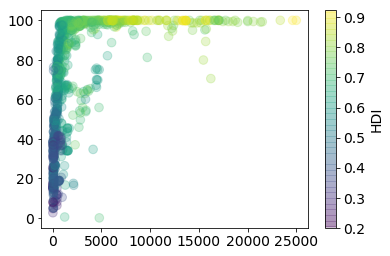

In [38]:
colors = df_HDIUseElec.hdi
plt.scatter(df_HDIUseElec.use, df_HDIUseElec.elec, c=colors, s=75, alpha = 0.25)

# The following adds a legend according to the chart coloring.
cbar = plt.colorbar();  # show color scale
cbar.set_label('HDI')

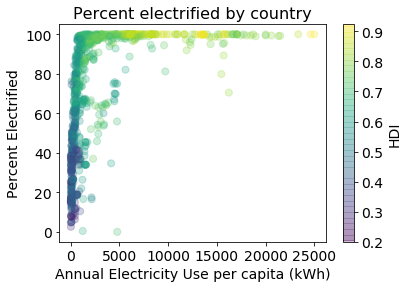

In [39]:
colors = df_HDIUseElec.hdi

plt.scatter(df_HDIUseElec.use, df_HDIUseElec.elec, c=colors, s=50, alpha=0.25)

plt.xlabel('Annual Electricity Use per capita (kWh)')
plt.ylabel('Percent Electrified');
plt.title('Percent electrified by country');
cbar = plt.colorbar();  # show color scale
cbar.set_label('HDI')

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

## Transformations
Much of the data points are scrunched up against the y-axis.

**Q8)** What transformations to the data could we use to make the plot easier to read?

In [ ]:
# your answer here

Let's use the log transformation for the previous plot:

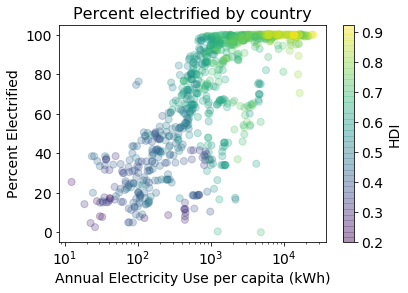

In [40]:
# Original code:
colors = df_HDIUseElec.hdi

##############
#HERE IS THE NEW CODE:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
#############

plt.scatter(df_HDIUseElec.use, df_HDIUseElec.elec, c=colors, s=50, alpha=0.25)

plt.xlabel('Annual Electricity Use per capita (kWh)')
plt.ylabel('Percent Electrified');
plt.title('Percent electrified by country');
cbar = plt.colorbar();  # show color scale
cbar.set_label('HDI')

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

**Q9)** Read the documentation for matplotlib's scatter and find three things to change in this figure.  See if you can improve on what we've given you as a starting point.  Why do you think it's better?

In [ ]:
# ANSWER